<a href="https://colab.research.google.com/github/motieno83/Data-Science/blob/main/insurance_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
one_hot = pd.get_dummies(insurance)

In [4]:
x = one_hot.drop('charges', axis = 1)
y = one_hot['charges']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 42)
len(x_train),len(x_test)

(1070, 268)

In [7]:
#set_seed
tf.random.set_seed(42)

# 1. Create the model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics = ['mae'])
#3. Fit the model
insurance_model.fit(x_train,y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 938us/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 935us/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 936us/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 983us/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7

In [8]:
#check the results on the test data
insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [18]:
#improove our model
#1.Add an Extra Layer

#set random Seed
tf.random.set_seed(42)
#Build the model
insurance_model_1 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])
insurance_model_1.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])
insurance_model_1.fit(x_train,y_train, epochs = 100,verbose = 0)

In [19]:
#evaluate the model
insurance_model_1.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

In [20]:
#train for longer
#set random Seed
tf.random.set_seed(42)
#Build the model
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])
history = insurance_model_2.fit(x_train,y_train, epochs = 200,verbose = 0)

In [21]:
insurance_model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3494.5291 - mae: 3494.5291


[3494.529052734375, 3494.529052734375]

Text(0.5, 0, 'epoch')

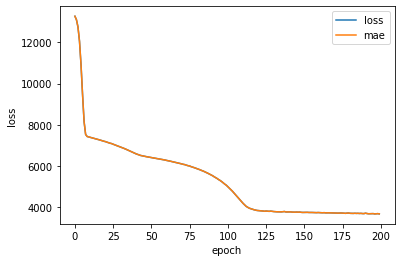

In [22]:
#plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epoch')

## *PREPROCESSING DATA*
Standadizing and Normalizing

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

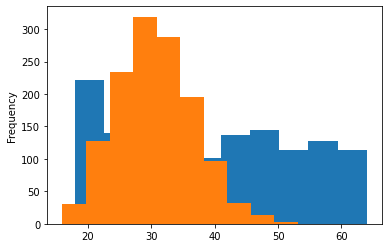

In [26]:
x['age'].plot(kind = 'hist')
x['bmi'].plot(kind= 'hist')
x['children'].value_counts()

**Normalization**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [28]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [30]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [31]:
#create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region'])
)
#create x and y
x = insurance.drop('charges', axis = 1)
y = insurance['charges']

#train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

#fit column transformer to our training
ct.fit(x_train)
#transorm training and test data with minmaxscalar and onhotencoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [33]:
#what does our data look like
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [37]:
#train using normalized model
#set random Seed
tf.random.set_seed(42)
#Build the model
insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])
history = insurance_model_3.fit(x_train_normal,y_train, epochs = 100,verbose = 0)

In [38]:
insurance_model_3.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

Text(0.5, 0, 'epochs')

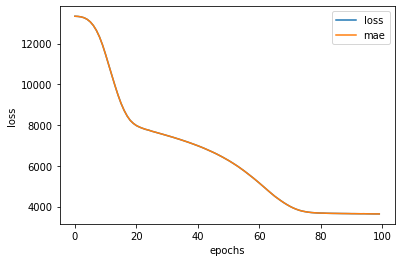

In [40]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')